# European Credit Card Dataset - Exploratory Data Analysis

## Data Loading and Initial Exploration


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [13]:
fraud_df2 = pd.read_csv('data/creditcard_2023.csv')
fraud_df2.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [14]:
fraud_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [15]:
fraud_df2.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Dataset Overview**

The European credit card dataset contains 568,630 transactions with 31 features. This is the real-world anonymized dataset with PCA-transformed features (V1-V28), original Amount, and Class (fraud indicator). All features are complete with no missing values, indicating high data quality from the European cardholders' transactions.

**Missing Data Analysis**

Perfect data quality - no missing values across all 31 features. This is typical of well-preprocessed financial datasets where data integrity is crucial for fraud detection systems.

In [16]:
fraud_df2.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.323544e-16,-3.518788e-17,-2.879008e-17,7.197521e-18,-3.838678e-17,-3.198898e-17,2.069287e-17,9.116859e-17,...,4.758361e-17,5.398140e-18,5.395017e-18,-1.999311e-18,-3.028957e-17,-7.547400e-18,-3.598760e-17,2.499139e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0



**Statistical Summary Insights**

- **V1-V28**: PCA-transformed features with perfect standardization (mean ≈ 0, std = 1), indicating proper preprocessing

- **Amount**: Mean transaction of €12,042 with standard deviation of €6,920, ranging from €50 to €24,040

<br/>
<br/>

## Data Distribution Analysis

In [17]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
    _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}')

def get_unique_values(data, column):
    num_unique_values = len(data[column].unique())
    value_counts = data[column].value_counts()
    print(f"Column: {column} has {num_unique_values} unique values\n")
    print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
    _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect, palette='Set2').set(title=f'Distribution of {column}')

<br/>

### Key Variable Distributions

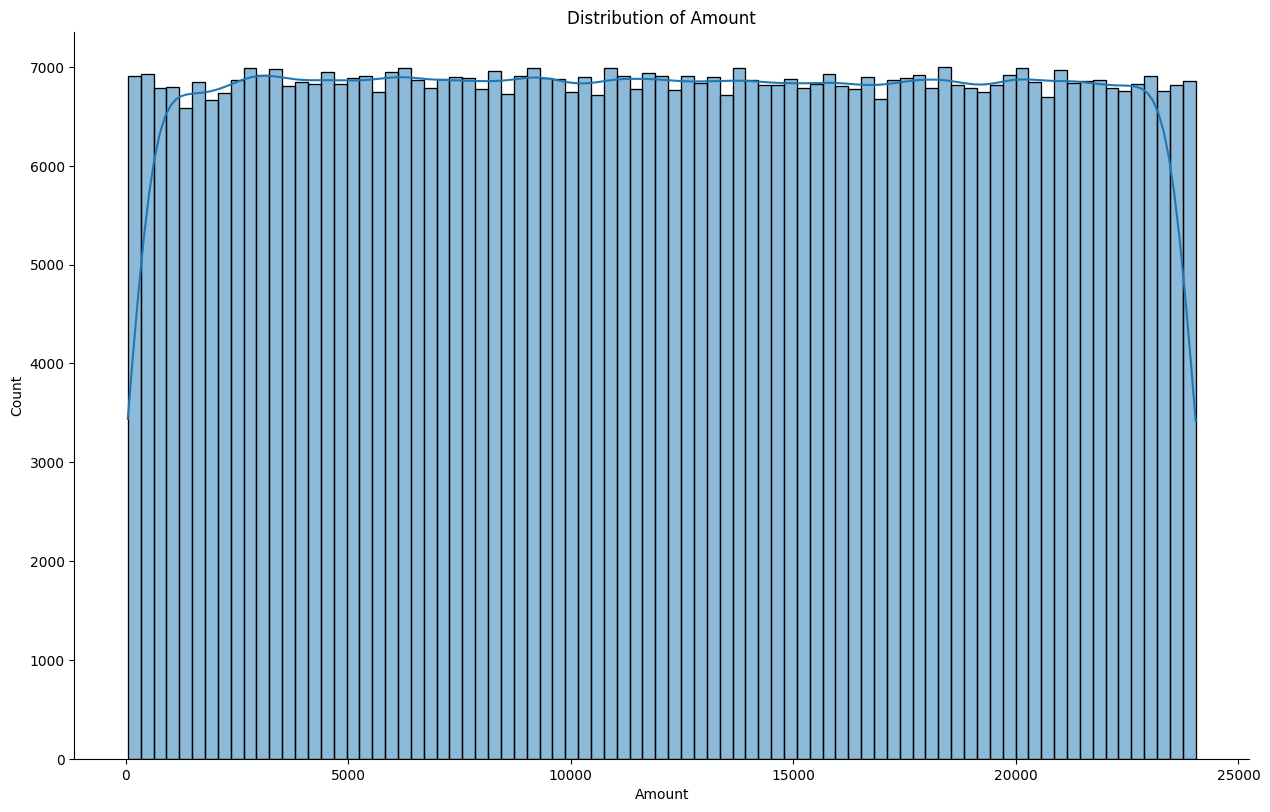

In [18]:
# Analyze the main interpretable features
plot_continuous_distribution(fraud_df2, 'Amount')

In [19]:
get_unique_values(fraud_df2, 'Class')

Column: Class has 2 unique values

0    284315
1    284315
Name: Class, dtype: int64


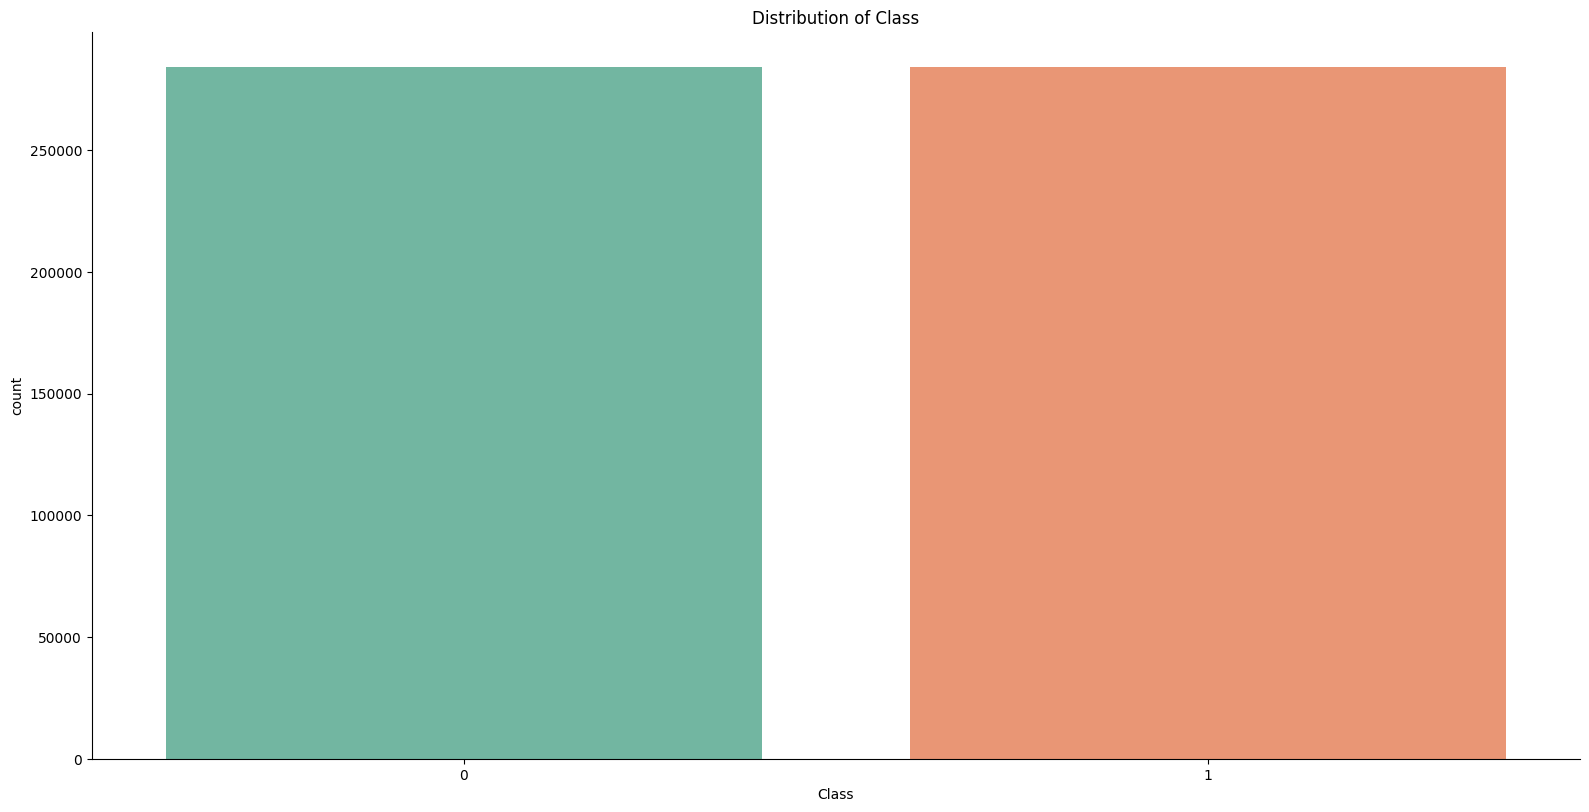

In [20]:
plot_categorical_distribution(fraud_df2, 'Class')

In [21]:
# Detailed class distribution
class_counts = fraud_df2['Class'].value_counts()
class_percentages = fraud_df2['Class'].value_counts(normalize=True) * 100

print("Class Distribution:")
print(f"Legitimate (0): {class_counts[0]:,} ({class_percentages[0]:.2f}%)")
print(f"Fraud (1): {class_counts[1]:,} ({class_percentages[1]:.2f}%)")
print(f"Fraud Rate: {class_percentages[1]:.3f}%")

Class Distribution:
Legitimate (0): 284,315 (50.00%)
Fraud (1): 284,315 (50.00%)
Fraud Rate: 50.000%


**Amount and Class Distribution**

- **Amount Distribution**: Uniform distribution across the entire range from €50 to €24,040, which is highly unusual for real financial data. This artificial uniformity suggests synthetic data generation or significant preprocessing that removed natural transaction patterns.

- **Class Distribution**: Perfect 50-50 split between fraud and legitimate transactions (284,315 each) is extremely unrealistic for fraud detection scenarios. Real-world fraud rates are typically 0.1-2%, making this dataset artificially balanced for training purposes.

<br/>

### PCA Features Analysis

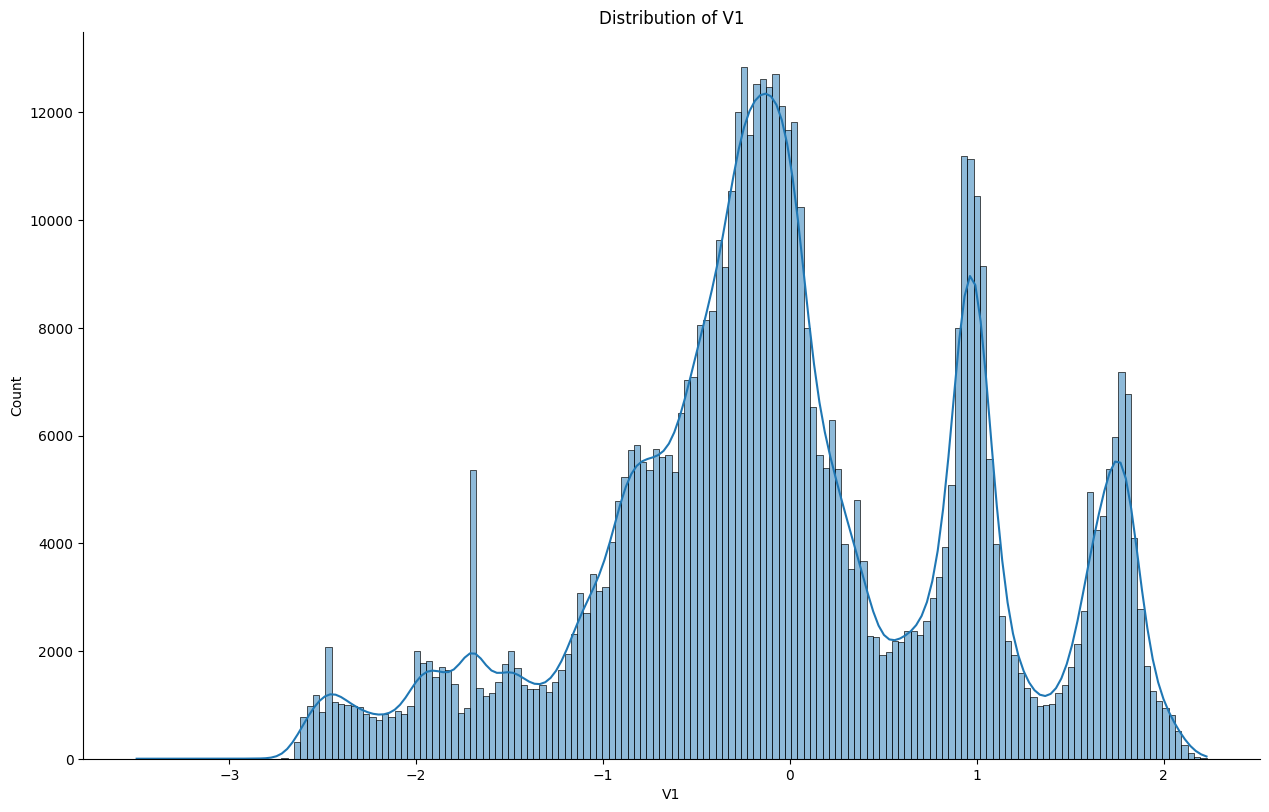

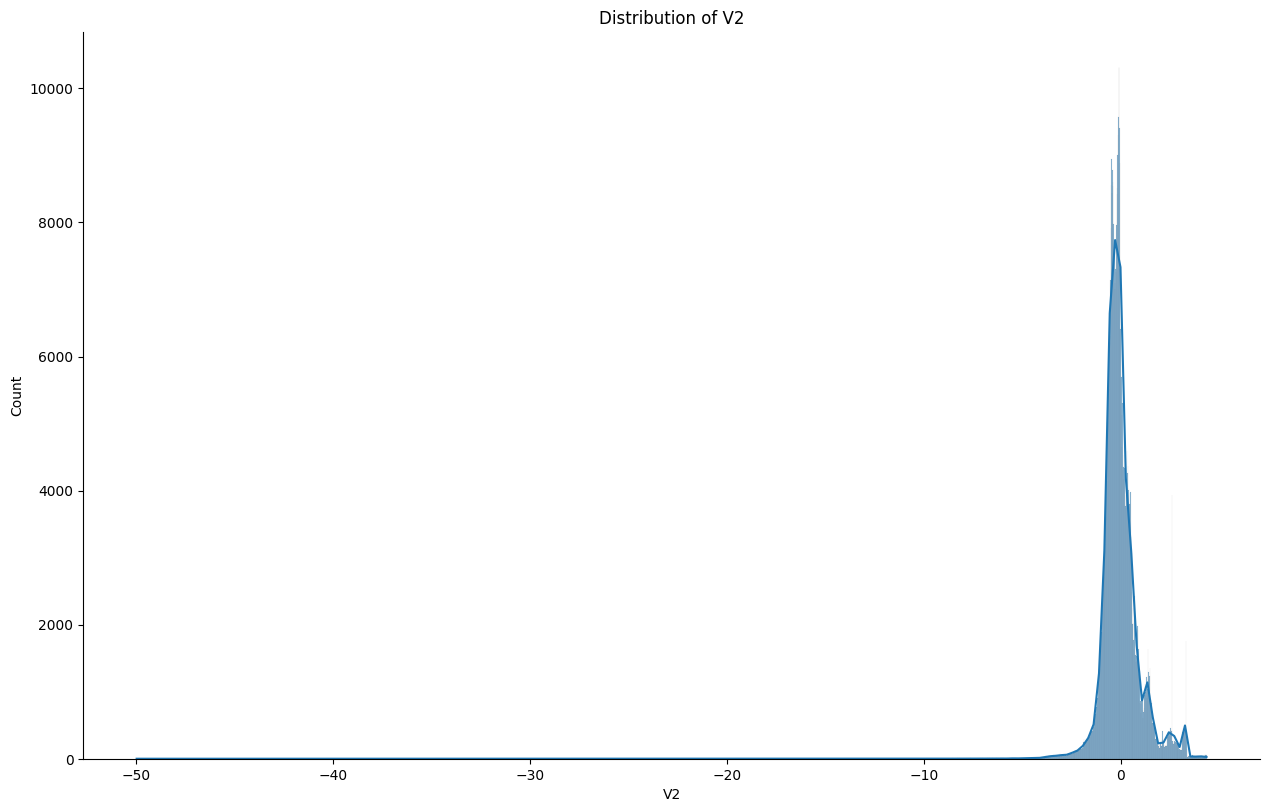

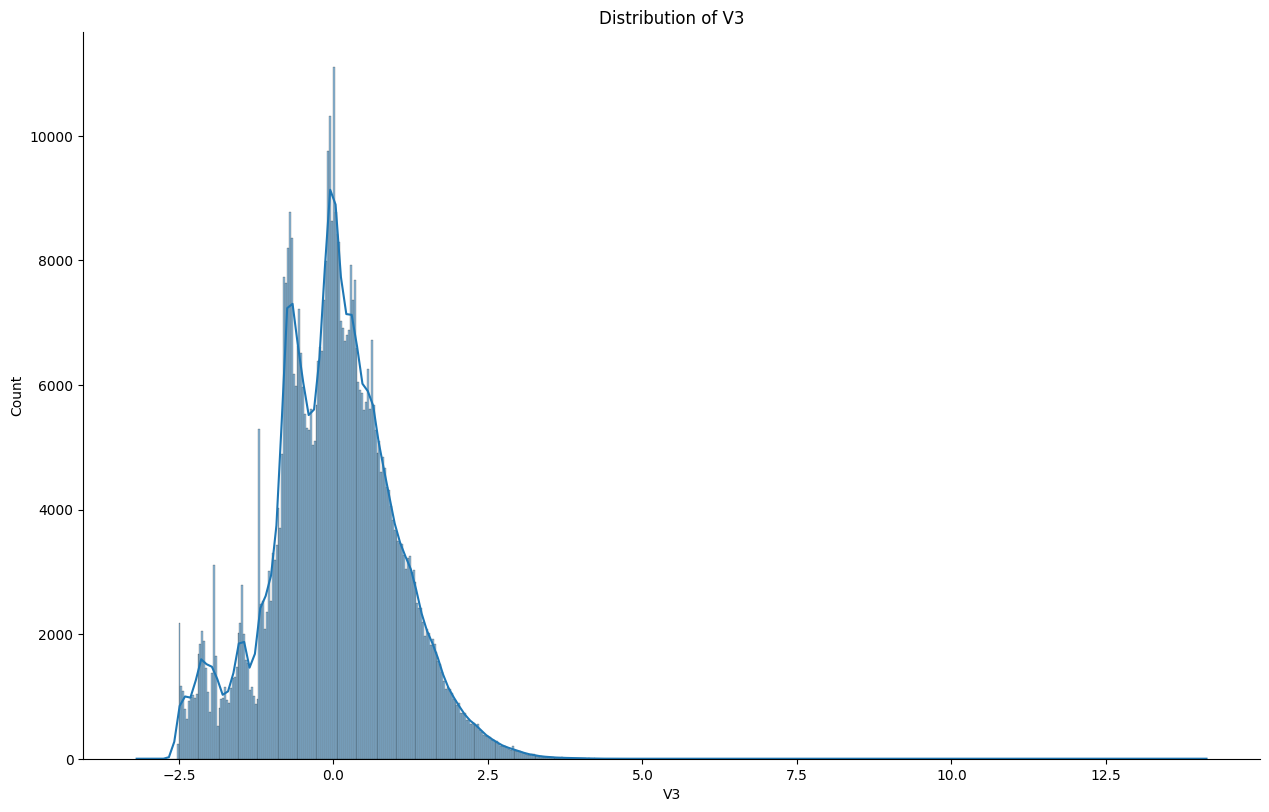

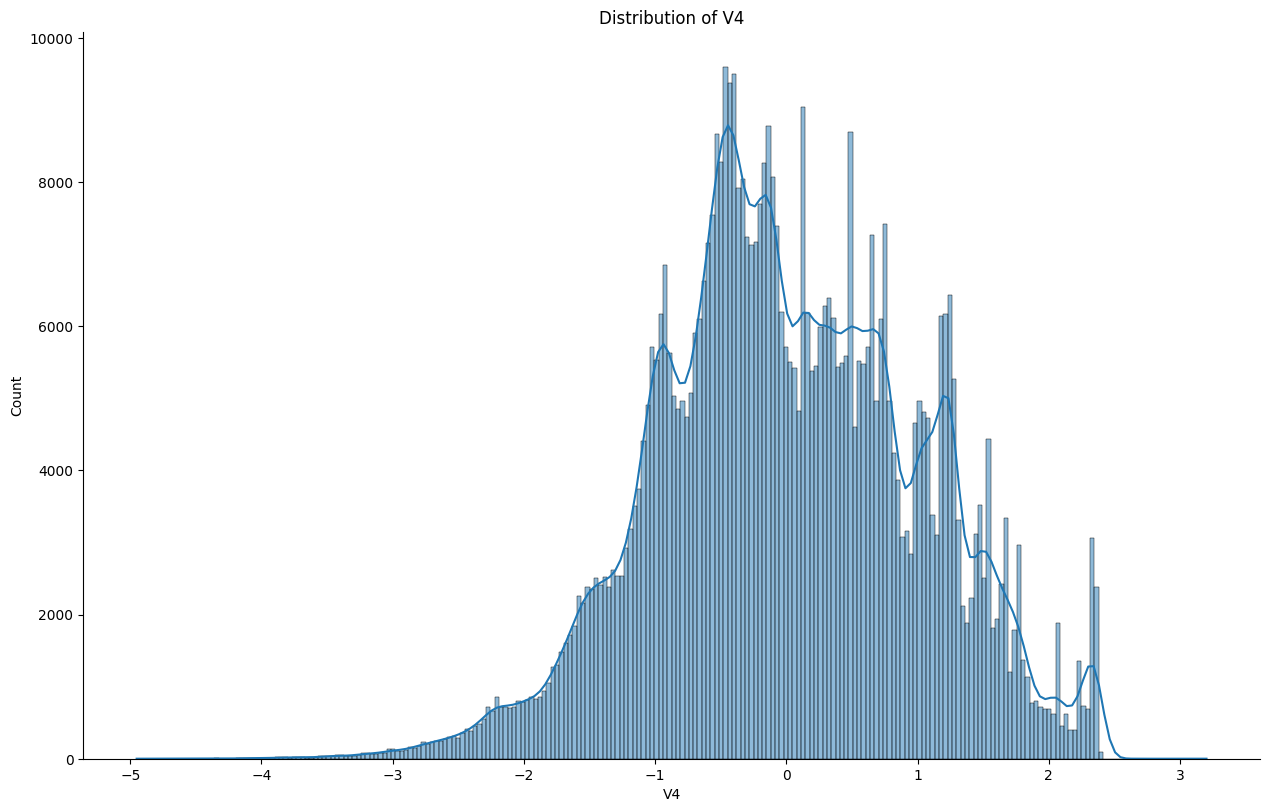

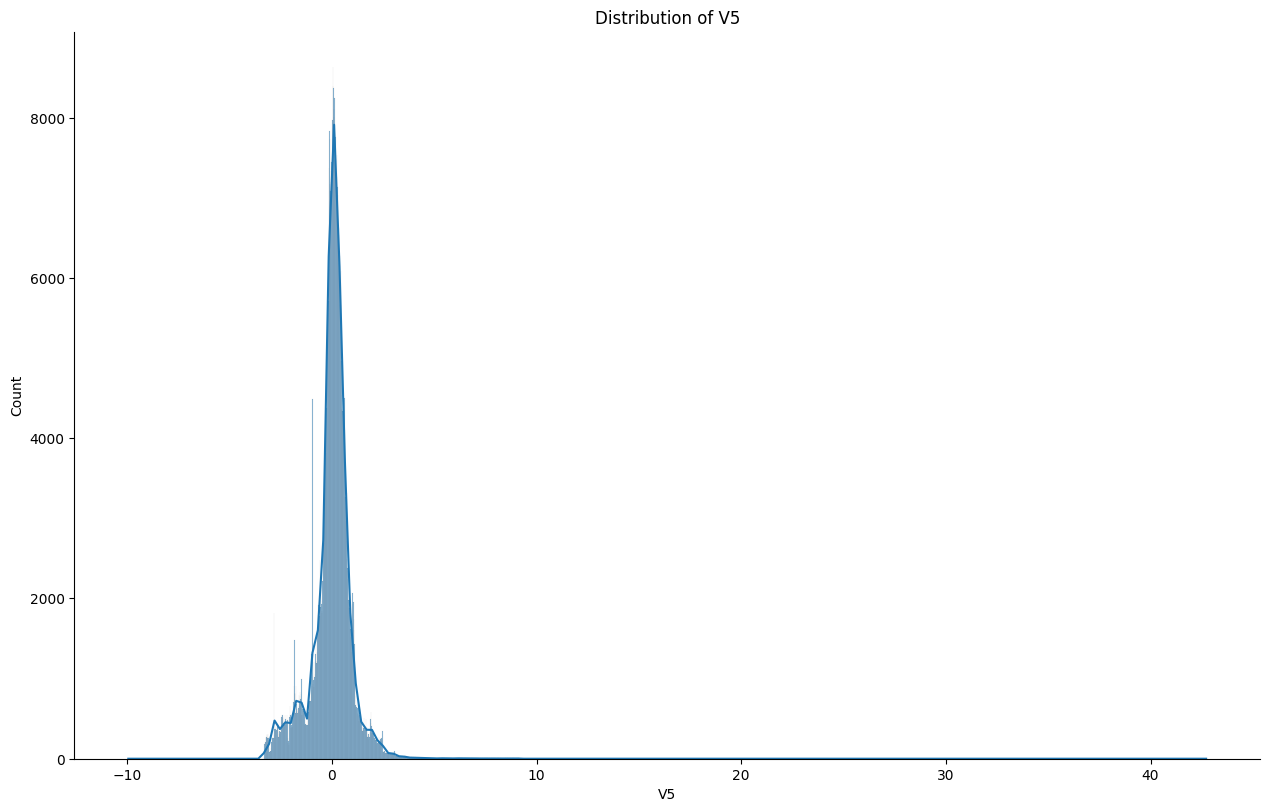

In [22]:
# Analyze a sample of PCA-transformed features
pca_sample_features = ['V1', 'V2', 'V3', 'V4', 'V5']
for feature in pca_sample_features:
    plot_continuous_distribution(fraud_df2, feature)

**PCA Features Characteristics**

The V1-V28 features show diverse distribution patterns typical of PCA-transformed data:

- V1: Multi-modal distribution with several peaks, suggesting complex underlying patterns
- V2: Extremely right-skewed with most values concentrated near zero and a long tail extending to positive values
- V3: Right-skewed distribution with a sharp peak near zero and gradual decline
- V4: Complex multi-modal distribution with multiple peaks across the range
- V5: Highly concentrated around zero with a sharp peak and minimal spread

These varied distributions indicate the PCA transformation has captured different types of variability from the original features, with some components representing common patterns (narrow distributions) and others capturing outliers or specific behaviors (wider distributions).

<br/>

### Amount-based Fraud Analysis

In [23]:
# Fraud analysis by amount ranges
fraud_df2['amount_bin'] = pd.cut(fraud_df2['Amount'], 
                                bins=[0, 50, 200, 500, 1000, 30000], 
                                labels=['<€50', '€50-200', '€200-500', '€500-1000', '>€1000'])

amount_fraud = fraud_df2.groupby('amount_bin')['Class'].agg(['count', 'sum', 'mean'])
amount_fraud['fraud_rate'] = amount_fraud['mean'] * 100
print("Fraud rates by amount ranges:")
print(amount_fraud)

Fraud rates by amount ranges:
             count     sum      mean  fraud_rate
amount_bin                                      
<€50             0       0       NaN         NaN
€50-200       3529    1726  0.489090   48.909039
€200-500      7260    3587  0.494077   49.407713
€500-1000    11721    5812  0.495862   49.586213
>€1000      546120  273190  0.500238   50.023804


- No Small Transactions: Complete absence of transactions under €50 indicates preprocessing that removed small-value transactions.

- Consistent Fraud Rates: Fraud rates remain remarkably consistent across all amount ranges (48.9% to 50.0%), showing no relationship between transaction amount and fraud likelihood. This uniform distribution is unrealistic as real fraud patterns typically show amount-based preferences.

- High-Value Transactions: The majority of transactions (546,120 out of 568,630) are above €1,000, which is atypical for consumer credit card usage where smaller transactions usually dominate.

<br/>

### Feature Correlation Analysis

In [24]:
# Calculate correlations between features and fraud
from scipy.stats import pointbiserialr

correlations = {}
feature_cols = [col for col in fraud_df2.columns if col.startswith('V')] + ['Amount']

for col in feature_cols:
    corr, p_value = pointbiserialr(fraud_df2['Class'], fraud_df2[col])
    correlations[col] = {'correlation': abs(corr), 'p_value': p_value, 'raw_correlation': corr}

# Sort by absolute correlation strength
sorted_correlations = sorted(correlations.items(), key=lambda x: x[1]['correlation'], reverse=True)

print("Top 10 Features by Correlation with Fraud:")
print("Feature\tCorrelation\tP-value")
print("-" * 40)
for feature, stats in sorted_correlations[:10]:
    print(f"{feature}\t{stats['raw_correlation']:.4f}\t\t{stats['p_value']:.2e}")

Top 10 Features by Correlation with Fraud:
Feature	Correlation	P-value
----------------------------------------
V14	-0.8057		0.00e+00
V12	-0.7686		0.00e+00
V4	0.7360		0.00e+00
V11	0.7243		0.00e+00
V3	-0.6821		0.00e+00
V10	-0.6737		0.00e+00
V9	-0.5855		0.00e+00
V16	-0.5735		0.00e+00
V1	-0.5058		0.00e+00
V2	0.4919		0.00e+00


**Feature Importance by Correlation**

- Strong Discriminative Features: Several PCA features show exceptionally strong correlations with fraud:

1. V14 (-0.8057) and V12 (-0.7686) have the strongest negative correlations
2. V4 (0.7360) and V11 (0.7243) show strong positive correlations
3. All top 10 features have correlations above 0.49, indicating excellent fraud discrimination

- Statistical Significance: All correlations have p-values of 0.00, confirming high statistical significance across the entire dataset.

- Model-Ready Features: The strong correlations suggest these PCA features will be highly effective for machine learning models, with the top features likely driving most of the predictive power.

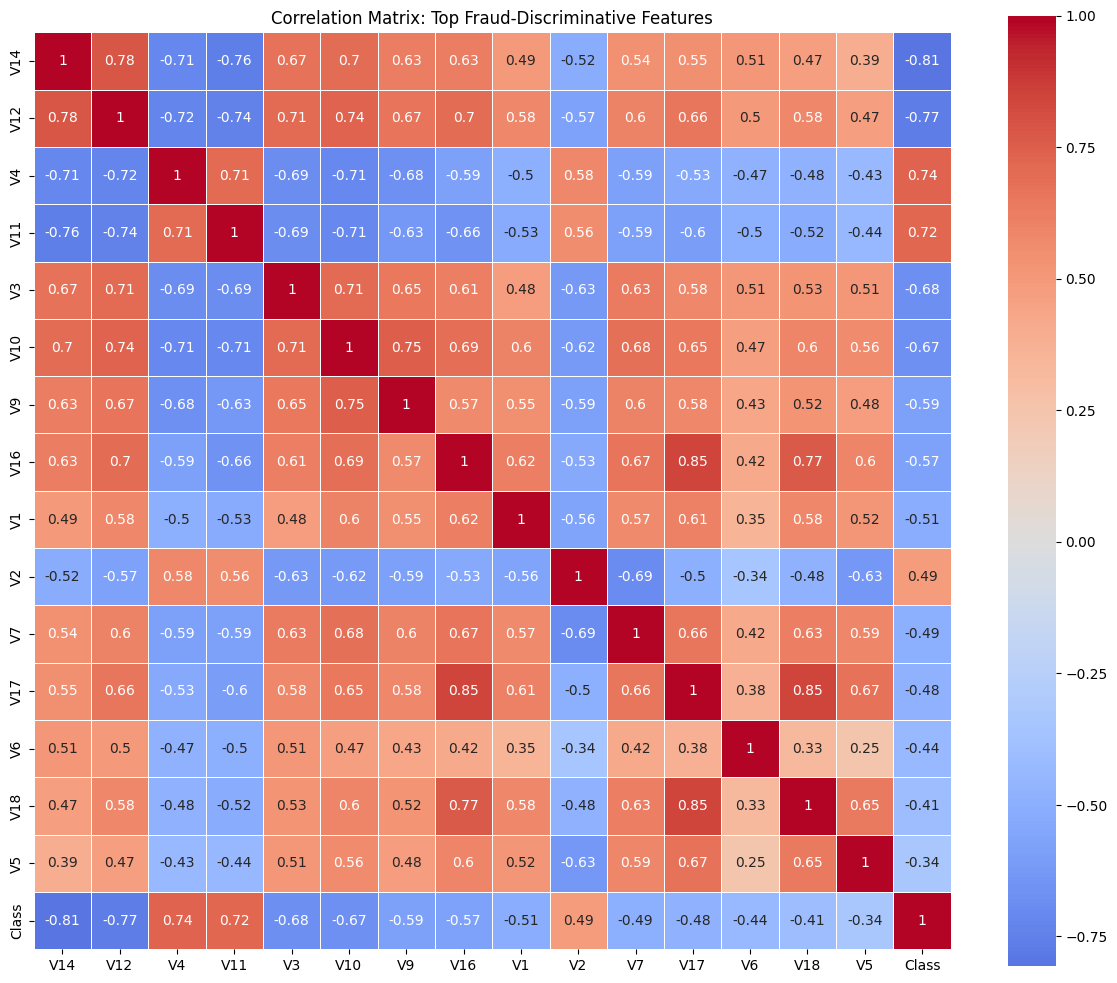

In [25]:
# Correlation heatmap for top features
top_features = [item[0] for item in sorted_correlations[:15]] + ['Class']
correlation_matrix = fraud_df2[top_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix: Top Fraud-Discriminative Features')
plt.tight_layout()
plt.show()

- High Inter-feature Correlations: The heatmap reveals strong correlations between many PCA features (0.6-0.85), indicating potential redundancy. Notable patterns include:

1. V14 and V12 are highly correlated (0.78), both strong fraud predictors
2. V16 and V17 show very strong correlation (0.85)
3. V10 and V1 are strongly correlated (0.74)

- Fraud Correlation Consistency: Features with strong fraud correlations tend to be correlated with each other, suggesting they capture related aspects of fraudulent behavior.

<br/>